## Introduction
The car hire industry is rapidly evolving, with increasing emphasis on fuel-efficient and environmentally friendly vehicles. Fuel consumption and CO₂ emissions are critical considerations when selecting vehicles for a fleet, as they directly impact operating costs and sustainability goals. This project examines these factors using a structured, data-driven approach. We will:
- Review car industry insights on fuel consumption, emissions, fuel types, engine sizes, and transmission types.
- Analyze a dataset of vehicles to identify makes and models with optimal fuel efficiency and low emissions.
- Perform statistical analyses, including trend analysis and regression, to understand how vehicle characteristics influence fuel consumption and emissions.
- Provide actionable recommendations for the company to build an efficient, low-emission fleet.

## Problem Statement
A car hire company plans to acquire a fleet designed to help clients minimize fuel costs. To ensure that clients have access to the most fuel-efficient vehicles, the company seeks guidance on which car makes and models offer the best fuel economy and lowest CO₂ emissions across various vehicle classes. This analysis will investigate the impact of factors like fuel type, engine size, and transmission type on fuel consumption and emissions. The goal is to recommend an optimal fleet mix that balances client cost savings with environmental responsibility.



![Emmotoka Car Dealers](carhire.png)


## Objectives
1. Understanding the Dataset
- Goal: 
    - Gain a thorough understanding of the dataset’s structure, terminology, and quality.
- Tasks:
    - Review dataset shape, data types (numerical and categorical columns), and understand technical terms or acronyms.
    - Handle missing values by deciding whether to replace or drop them.
    - Identify and remove duplicates to ensure data integrity.
    - Drop any unnecessary columns not relevant to the analysis.
    - Add new columns if necessary to enhance analysis (e.g., aggregated metrics or fuel cost calculations).
2. Industry Background
- Goal: 
    - Establish foundational knowledge on car industry factors impacting fuel consumption and CO₂ emissions.
- Method:
    - Conduct research on how fuel type, engine size, and transmission type affect emissions and fuel efficiency.
    - Use resources like the Green Vehicle Guide, the European Commission, and relevant studies to understand industry standards and benchmarks.
3. Business Objectives
- Goal: 
    - Help the car hire company select fuel-efficient, low-emission vehicles to maximize client savings.
- Specific Objectives:
    - Identify Top Makes by Class: Select 3-5 car makes per vehicle class that offer the best fuel   efficiency and lowest CO₂ emissions.
    - Investigate Key Influences on Efficiency and Emissions:
    a. Make Analysis: Determine how different makes perform in terms of fuel efficiency and CO₂ emissions.
    b. Engine Size Impact: Assess how engine size correlates with fuel consumption and emissions.
    c. Transmission Type Influence: Examine if certain transmission types offer better fuel efficiency.
    d. Fuel Type Effect: Explore the effect of fuel type on emissions, especially for eco-conscious client preferences.
4. Statistical Analysis
    4.1 Trend Analysis:
    - Fuel Consumption Trends: Track average fuel consumption for the top 3 makes in each vehicle class over time.
    - Emission Trends: Track average CO₂ emissions for the top 3 makes in each class over time.
    4.2 Regression Analysis:
    - Effect of Engine Size: Quantify the effect of engine size on fuel efficiency.
    - Fuel Consumption & Emissions Relationship: Examine the relationship between combined fuel consumption (Comb L/100 KM) and emissions.
    - Transmission Type Analysis: Analyze how transmission type affects fuel efficiency.
    - Fuel Type Impact: Assess the influence of fuel type on emissions.
    4.3 Hypothesis Testing:
    - Test if relationships obtained in regression models are statistically significant, ensuring the robustness of findings.
5. Summary and Recommendations
- Goal: 
    - Synthesize findings and provide actionable recommendations to the car hire company.
- Outcomes:
    - Fleet Composition Advice: Recommend the optimal mix of vehicle makes that offer the best fuel economy and lowest CO₂ emissions.
    - Factor Impact Summary: Provide a summary of factors with statistically significant impacts on fuel efficiency and emissions to support future fleet decisions.

## Data Overview
*Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.*

### Data Info
**Model**
- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- CNG = Compressed natural gas
- FFV = Flexible-fuel vehicle
- NGV = Natural gas vehicle
- '# = High output engine that provides more power than the standard engine of the same size

**Transmission**
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears

**Fuel Type**
- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural Gas

**Fuel Consumption**
*City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.*

**DATA SOURCE** https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption

## Exploring the data

In [1]:
# Loading liraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv("../Data/Fuel_Consumption_2000_2022.csv")
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
# Basic information about the dataset
print("Basic Dataset Information")
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns ")
print("\nColumn names and types:")
print(df.dtypes)
print("\nSummary of missing values:")
print(df.isnull().sum())

Basic Dataset Information
This data set has 22556 rows and 13 columns 

Column names and types:
YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

Summary of missing values:
YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64


In [11]:
# Check the columns in the data
df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [12]:
#Brief data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,22556.0,2011.554442,6.298269,2000.0,2006.0,2012.0,2017.000,2022.0
ENGINE SIZE,22556.0,3.356646,1.335425,0.8,2.3,3.0,4.200,8.4
CYLINDERS,22556.0,5.854141,1.819597,2.0,4.0,6.0,8.000,16.0
FUEL CONSUMPTION,22556.0,12.763513,3.500999,3.5,10.4,12.3,14.725,30.6
HWY (L/100 km),22556.0,8.919126,2.274764,3.2,7.3,8.4,10.200,20.9
COMB (L/100 km),22556.0,11.034341,2.910920,3.6,9.1,10.6,12.700,26.1
COMB (mpg),22556.0,27.374534,7.376982,11.0,22.0,27.0,31.000,78.0
EMISSIONS,22556.0,250.068452,59.355276,83.0,209.0,243.0,288.000,608.0


In [13]:
# Unique values and counts for 'VEHICLE CLASS', sorted alphabetically
vehicle_class_counts = df['VEHICLE CLASS'].value_counts().sort_index()
print("Unique Values and Counts in VEHICLE CLASS")
print(vehicle_class_counts)



Unique Values and Counts in VEHICLE CLASS
VEHICLE CLASS
COMPACT                     2636
Compact                      491
FULL-SIZE                   1086
Full-size                    417
MID-SIZE                    2300
MINICOMPACT                  783
MINIVAN                      366
Mid-size                     660
Minicompact                  211
Minivan                       42
PICKUP TRUCK - SMALL         403
PICKUP TRUCK - STANDARD     1689
Pickup truck: Small          108
Pickup truck: Standard       515
SPECIAL PURPOSE VEHICLE       52
STATION WAGON - MID-SIZE     343
STATION WAGON - SMALL        737
SUBCOMPACT                  1559
SUV                         2640
SUV - SMALL                  827
SUV - STANDARD               514
SUV: Small                   929
SUV: Standard                608
Special purpose vehicle       62
Station wagon: Mid-size       44
Station wagon: Small         140
Subcompact                   451
TWO-SEATER                   999
Two-seater          

In [14]:
# Unique values and counts for 'MODEL', sorted alphabetically
model_counts = df['MODEL'].value_counts().sort_index()
print("\n Unique Values and Counts in MODEL")
print(model_counts)


 Unique Values and Counts in MODEL
MODEL
1 SERIES M COUPE     1
1.6EL                2
1.7EL               10
124 SPIDER           2
124 Spider           6
                    ..
iM                   2
iQ                   4
tC                  12
xB                  10
xD                   8
Name: count, Length: 4242, dtype: int64


In [23]:
# Create a copy of the dataset to be able to manipulate the data without changing original document
df_copy = df.copy()

# Convert column headers to sentence case in df_copy
df_copy.columns = df_copy.columns.str.title()

# Display the updated column headers to verify the change
print("Updated Column Headers in Copy of Data")
print(df_copy.columns)

# Convert 'MODEL' and 'VEHICLE CLASS' columns to sentence case and remove extra spaces
df_copy['Model'] = df_copy['Model'].str.title().str.strip()
df_copy['Vehicle Class'] = df_copy['Vehicle Class'].str.title().str.strip()

# Remove extra internal spaces in 'MODEL' and 'VEHICLE CLASS' columns
df_copy['Model'] = df_copy['Model'].str.replace(r'\s+', ' ', regex=True)
df_copy['Vehicle Class'] = df_copy['Vehicle Class'].str.replace(r'\s+', ' ', regex=True)

# Display the first few rows to verify the changes
print("Sample Data After Converting to Sentence Case and Removing Extra Spaces")
print(df_copy[['Model', 'Vehicle Class']].head())

Updated Column Headers in Copy of Data
Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel Consumption', 'Hwy (L/100 Km)',
       'Comb (L/100 Km)', 'Comb (Mpg)', 'Emissions'],
      dtype='object')
Sample Data After Converting to Sentence Case and Removing Extra Spaces
     Model Vehicle Class
0    1.6El       Compact
1    1.6El       Compact
2    3.2Tl      Mid-Size
3    3.5Rl      Mid-Size
4  Integra    Subcompact


In [17]:
# Unique values and counts for 'VEHICLE CLASS', sorted alphabetically
vehicle_class_counts = df_copy['Vehicle Class'].value_counts().sort_index()
print("Unique Values and Counts in Vehicle Class")
print(vehicle_class_counts)

# Unique values and counts for 'MODEL', sorted alphabetically
model_counts = df_copy['Model'].value_counts().sort_index()
print("\nUnique Values and Counts in Model")
print(model_counts)

Unique Values and Counts in Vehicle Class
Vehicle Class
Compact                     3127
Full-Size                   1503
Mid-Size                    2960
Minicompact                  994
Minivan                      408
Pickup Truck - Small         403
Pickup Truck - Standard     1689
Pickup Truck: Small          108
Pickup Truck: Standard       515
Special Purpose Vehicle      114
Station Wagon - Mid-Size     343
Station Wagon - Small        737
Station Wagon: Mid-Size       44
Station Wagon: Small         140
Subcompact                  2010
Suv                         2640
Suv - Small                  827
Suv - Standard               514
Suv: Small                   929
Suv: Standard                608
Two-Seater                  1312
Van - Cargo                  332
Van - Passenger              287
Van: Passenger                12
Name: count, dtype: int64

Unique Values and Counts in Model
Model
1 Series M Coupe     1
1.6El                2
1.7El               10
124 Spider      

In [36]:
# Cleaning up the aove to remove : and replace with - to have similar data have similar spelling
# Replace ':' with ' -' in the 'VEHICLE CLASS' column
df_copy['Vehicle Class'] = df_copy['Vehicle Class'].str.replace(':', ' -')

# Display the first few rows to verify the changes
print("Sample Data After Replacing ':' with ' -' in Vehicle Class")
print(df_copy[['Vehicle Class']].head())

# Unique values and counts for 'MODEL', sorted alphabetically
class_counts = df_copy['Vehicle Class'].value_counts().sort_index()
print("\nUnique Values and Counts in class")
print(class_counts)


Sample Data After Replacing ':' with ' -' in Vehicle Class
  Vehicle Class
0       Compact
1       Compact
2      Mid-Size
3      Mid-Size
4    Subcompact

Unique Values and Counts in class
Vehicle Class
Compact                     3127
Full-Size                   1503
Mid-Size                    2960
Minicompact                  994
Minivan                      408
Pickup Truck - Small         511
Pickup Truck - Standard     2204
Special Purpose Vehicle      114
Station Wagon - Mid-Size     387
Station Wagon - Small        877
Subcompact                  2010
Suv                         2640
Suv - Small                 1756
Suv - Standard              1122
Two-Seater                  1312
Van - Cargo                  332
Van - Passenger              299
Name: count, dtype: int64


In [24]:
# Unique values and counts for 'MODEL', sorted alphabetically
model_counts2 = df_copy['Model'].value_counts().sort_index()
print("\n Unique Values and Counts in Model")
print(model_counts2)


 Unique Values and Counts in Model
Model
1 Series M Coupe     1
1.6El                2
1.7El               10
124 Spider           8
128I Cabriolet      12
                    ..
Z4 Sdrive35I        13
Z4 Sdrive35Is        6
Z8                   4
Zdx Awd              3
Zephyr               1
Name: count, Length: 3715, dtype: int64


In [44]:
# Count unique values in the original DataFrame
original_model_count = df['MODEL'].nunique()
original_vehicle_class_count = df['VEHICLE CLASS'].nunique()

# Count unique values in the copied (cleaned) DataFrame
copy_model_count = df_copy['Model'].nunique()
copy_vehicle_class_count = df_copy['Vehicle Class'].nunique()

# Display the counts
print("Unique Counts in Original DataFrame")
print(f"Unique models: {original_model_count}")
print(f"Unique vehicle classes: {original_vehicle_class_count}")

print("\nUnique Counts in Copied (Cleaned) DataFrame")
print(f"Unique models: {copy_model_count}")
print(f"Unique vehicle classes: {copy_vehicle_class_count}")

# Compare and summarize results
print("\nComparison Summary")
print(f"Difference in unique models: {original_model_count - copy_model_count}")
print(f"Difference in unique vehicle classes: {original_vehicle_class_count - copy_vehicle_class_count}")

Unique Counts in Original DataFrame
Unique models: 4242
Unique vehicle classes: 32

Unique Counts in Copied (Cleaned) DataFrame
Unique models: 3715
Unique vehicle classes: 17

Comparison Summary
Difference in unique models: 527
Difference in unique vehicle classes: 15


In [45]:
# Get the number of rows in the original and copied (cleaned) DataFrames
original_size = df.shape[0]
copy_size = df_copy.shape[0]

# Display the sizes
print("Size Comparison")
print(f"Number of rows in original DataFrame: {original_size}")
print(f"Number of rows in copied (cleaned) DataFrame: {copy_size}")

# Check if there's a difference
if original_size == copy_size:
    print("\nBoth DataFrames have the same number of rows.")
else:
    print(f"\nDifference in size: {original_size - copy_size} rows removed in the cleaned DataFrame.")


Size Comparison
Number of rows in original DataFrame: 22556
Number of rows in copied (cleaned) DataFrame: 22556

Both DataFrames have the same number of rows.


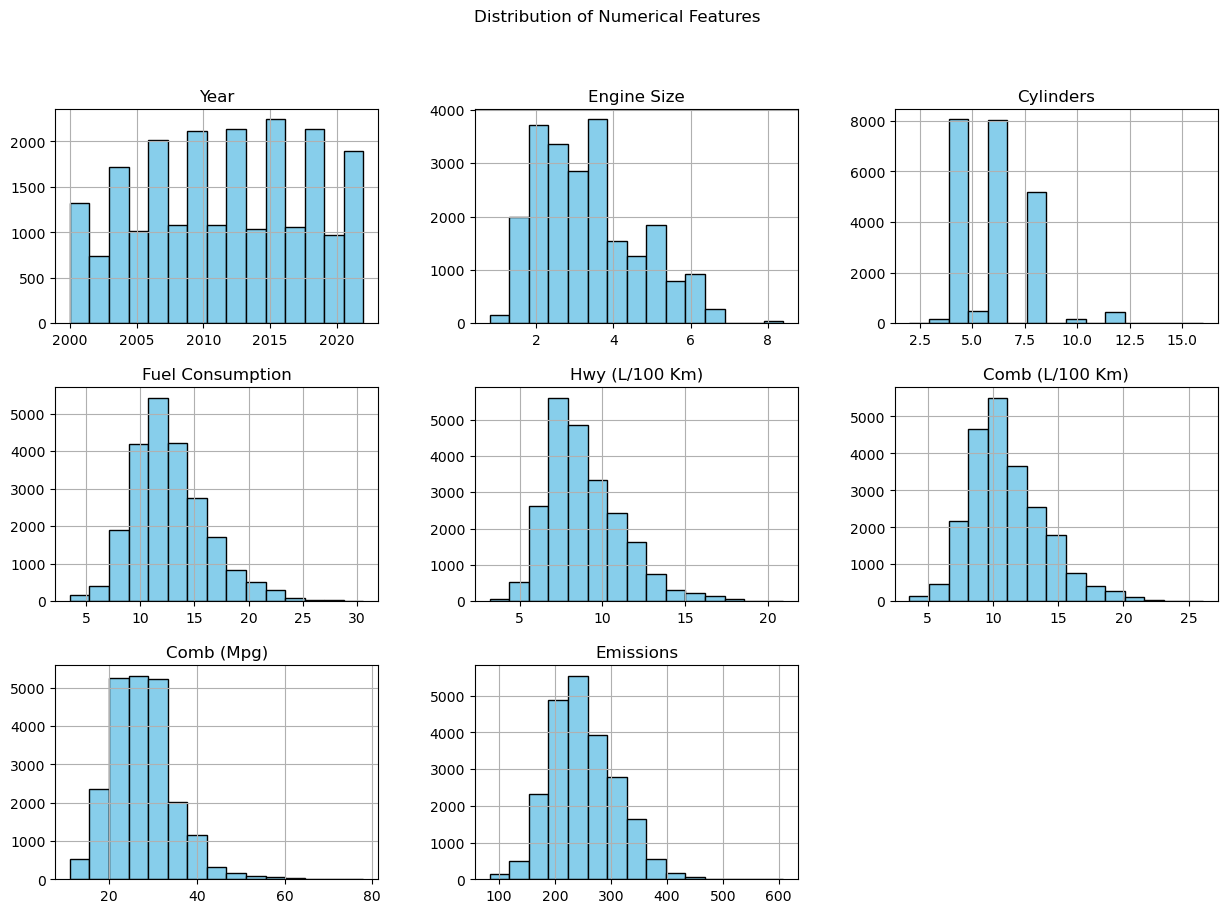

In [25]:
# Plotting Histograms for Numerical Features
df_copy.select_dtypes(include=['float64', 'int64']).hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

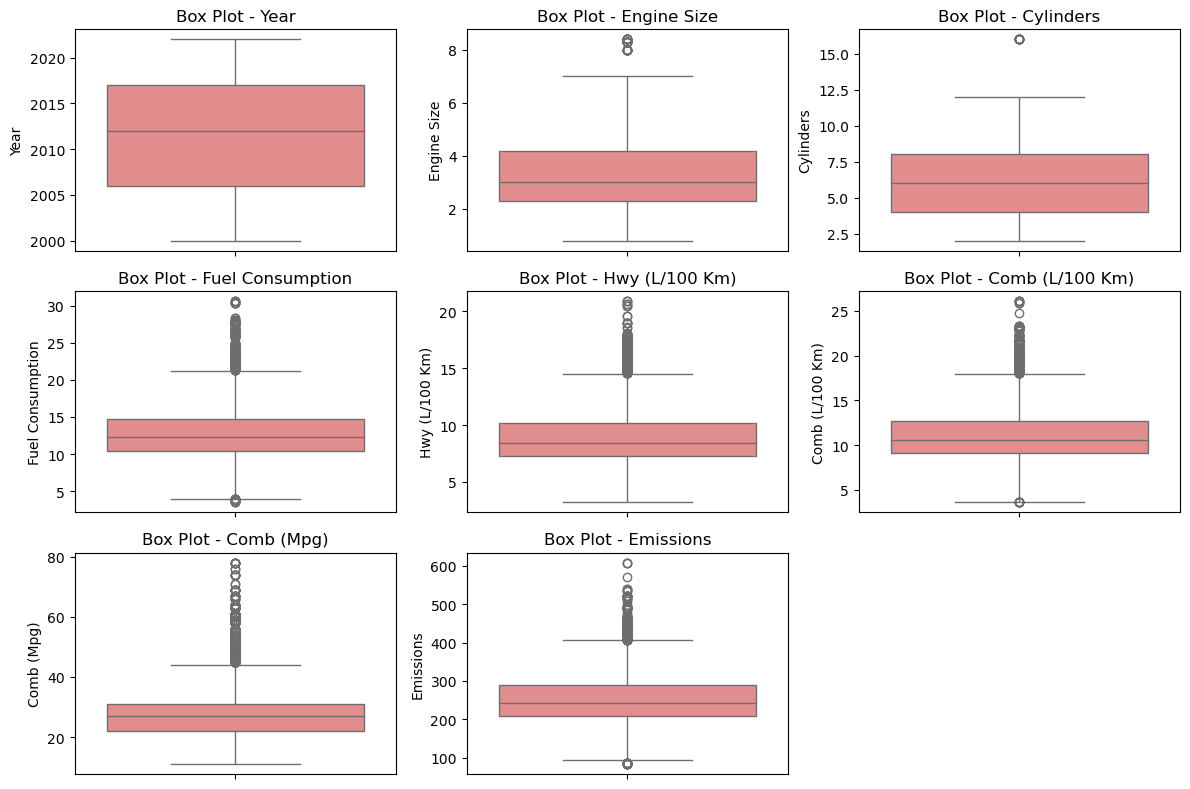

In [27]:
# Box Plots for Outliers Detection
num_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_copy[col], color="lightcoral")
    plt.title(f"Box Plot - {col}")
plt.tight_layout()
plt.show()

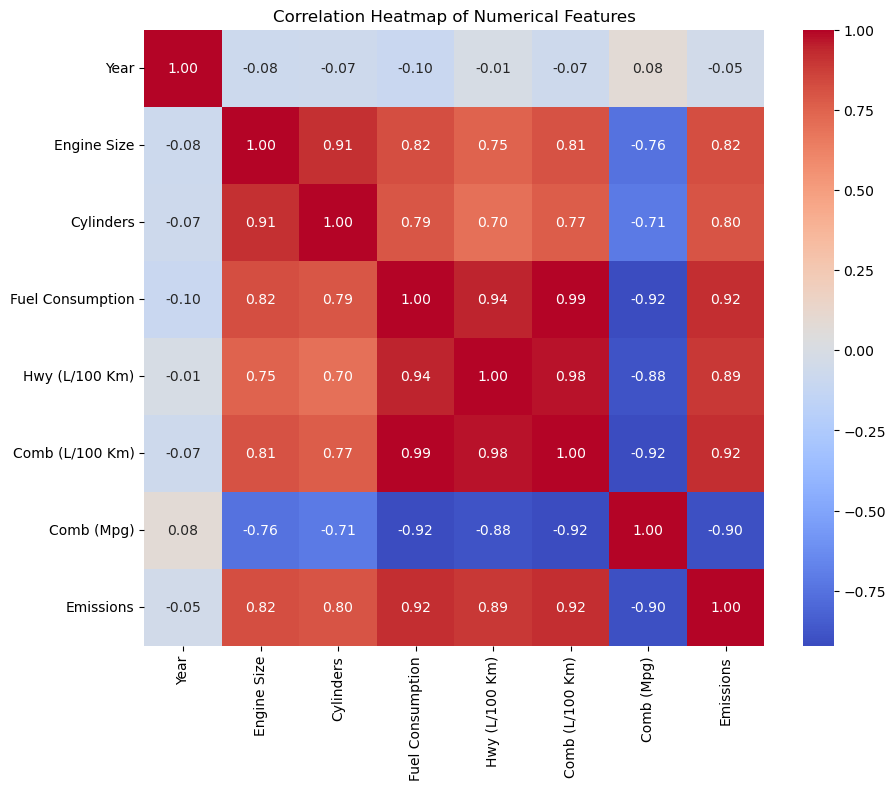

In [28]:
# Select only numerical columns for correlation
numeric_df = df_copy.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

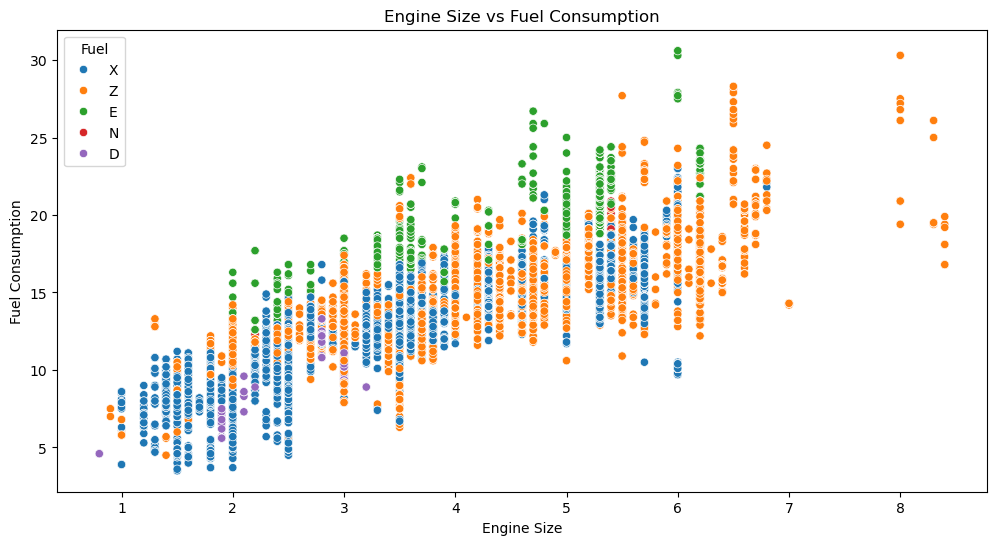

/var/folders/ng/_1y85s657s7fv7ng392fzw680000gn/T/ipykernel_2883/1053450291.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy, x='Fuel', y='Fuel Consumption', palette="Set2")


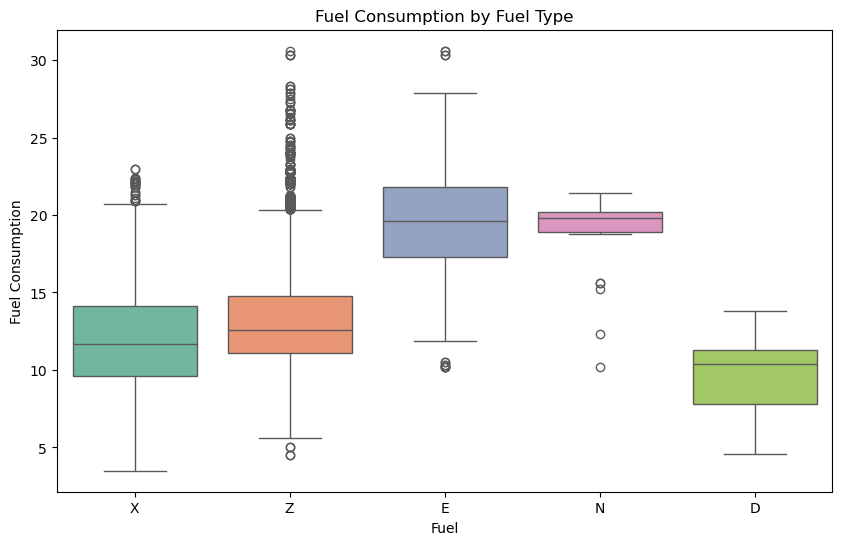

In [30]:
# Scatter Plot: Engine Size vs Fuel Consumption
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_copy, x='Engine Size', y='Fuel Consumption', hue='Fuel')
plt.title("Engine Size vs Fuel Consumption")
plt.show()

# Box Plot: Fuel Consumption by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='Fuel', y='Fuel Consumption', palette="Set2")
plt.title("Fuel Consumption by Fuel Type")
plt.show()



Average Fuel Consumption by Fuel Type
Fuel
D     9.727707
X    11.898452
Z    13.165554
N    19.024242
E    19.512325
Name: Fuel Consumption, dtype: float64


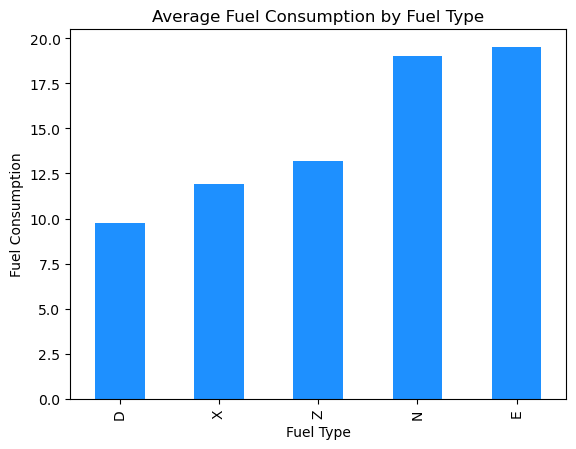

In [31]:
# Average Fuel Consumption by Fuel Type
fuel_type_stats = df_copy.groupby('Fuel')['Fuel Consumption'].mean().sort_values()
print("\nAverage Fuel Consumption by Fuel Type")
print(fuel_type_stats)

# Plot of Average Fuel Consumption by Fuel Type
fuel_type_stats.plot(kind='bar', color='dodgerblue')
plt.title("Average Fuel Consumption by Fuel Type")
plt.ylabel("Fuel Consumption")
plt.xlabel("Fuel Type")
plt.show()


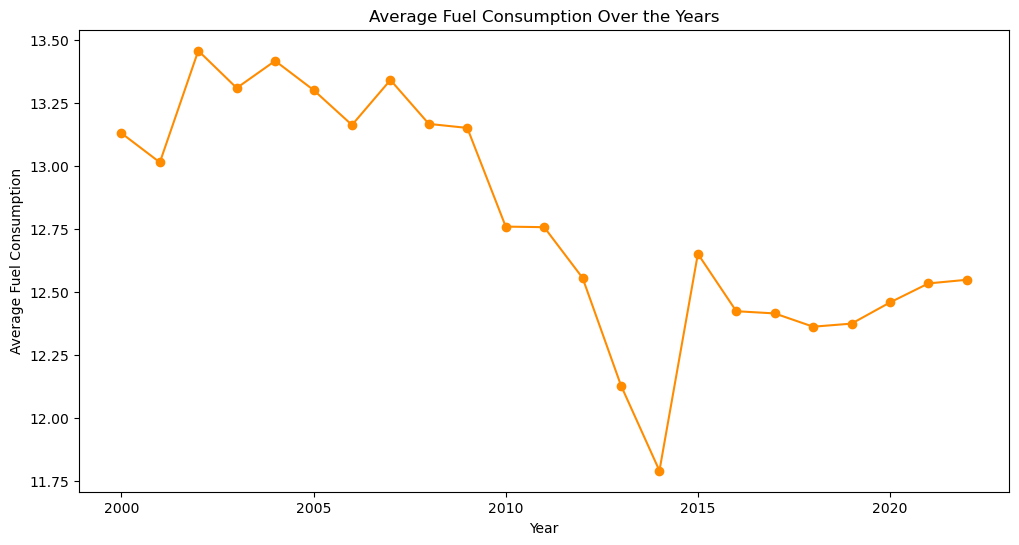

In [37]:
# Average Fuel Consumption Over the Years
if 'Year' in df_copy.columns:
    year_avg_fuel = df_copy.groupby('Year')['Fuel Consumption'].mean()
    plt.figure(figsize=(12, 6))
    year_avg_fuel.plot(marker='o', color='darkorange')
    plt.title("Average Fuel Consumption Over the Years")
    plt.ylabel("Average Fuel Consumption")
    plt.xlabel("Year")
    plt.show()



Average Fuel Consumption by Vehicle Type
Vehicle Class
Station Wagon - Small        9.986545
Compact                     10.656540
Suv - Small                 11.151651
Mid-Size                    11.412297
Special Purpose Vehicle     11.644737
Station Wagon - Mid-Size    11.769767
Subcompact                  11.795224
Minicompact                 11.904125
Pickup Truck - Small        13.006262
Minivan                     13.379902
Full-Size                   13.581770
Suv                         13.906705
Two-Seater                  13.938796
Suv - Standard              15.131729
Pickup Truck - Standard     15.783621
Van - Cargo                 17.704217
Van - Passenger             19.611037
Name: Fuel Consumption, dtype: float64


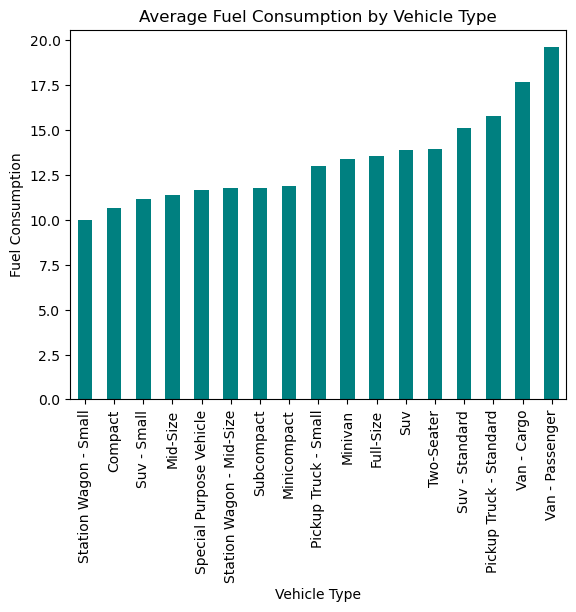

In [38]:
vehicle_type_avg = df_copy.groupby('Vehicle Class')['Fuel Consumption'].mean().sort_values()
print("\nAverage Fuel Consumption by Vehicle Type")
print(vehicle_type_avg)

# Plot fuel consumption by vehicle type
vehicle_type_avg.plot(kind='bar', color='teal')
plt.title("Average Fuel Consumption by Vehicle Type")
plt.ylabel("Fuel Consumption")
plt.xlabel("Vehicle Type")
plt.show()

In [40]:
# List top 10 fuel-efficient models
top_fuel_efficient = df_copy[['Model', 'Fuel Consumption']].sort_values(by='Fuel Consumption').head(10)
print("\nTop 10 Fuel-Efficient Models")
print(top_fuel_efficient)



Top 10 Fuel-Efficient Models
               Model  Fuel Consumption
12084        Prius C               3.5
13143        Prius C               3.5
14184        Prius C               3.6
11009          Prius               3.7
14183          Prius               3.7
12083          Prius               3.7
13684  Accord Hybrid               3.7
9912           Prius               3.7
13142          Prius               3.7
982          Insight               3.9



Average Fuel Consumption by Fuel Type
Fuel
D     9.727707
X    11.898452
Z    13.165554
N    19.024242
E    19.512325
Name: Fuel Consumption, dtype: float64


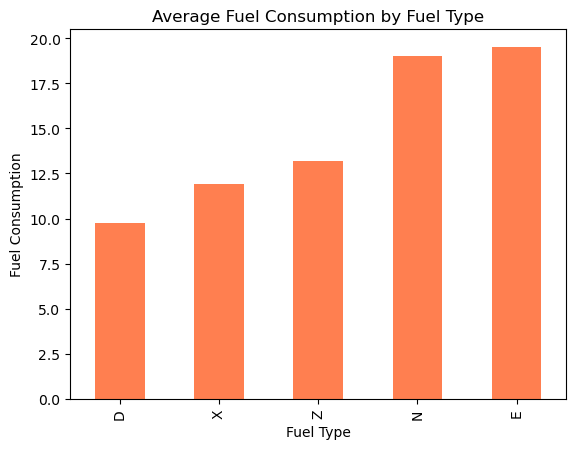

In [41]:
# Average fuel consumption by fuel type
fuel_type_avg = df_copy.groupby('Fuel')['Fuel Consumption'].mean().sort_values()
print("\nAverage Fuel Consumption by Fuel Type")
print(fuel_type_avg)

# Plot average fuel consumption by fuel type
fuel_type_avg.plot(kind='bar', color='coral')
plt.title("Average Fuel Consumption by Fuel Type")
plt.ylabel("Fuel Consumption")
plt.xlabel("Fuel Type")
plt.show()
